In [1]:
from pycbc import types, fft, waveform, psd, filter
import matplotlib.pyplot as plt
import numpy as np

/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.14.1/lib/python2.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


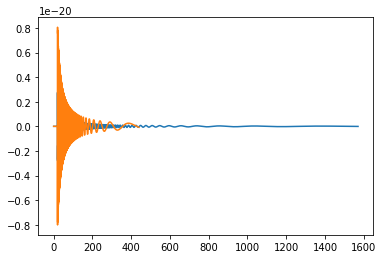

In [2]:
m1 = 1.4
m2 = 1.4
m3 = 5
m4 = 5
f_low = 20
df = 1./512

sp1,sc1 = waveform.get_fd_waveform(approximant="TaylorF2",
                         mass1=m1,
                         mass2=m2,
                         f_lower=f_low,
                         delta_f=df,phase_order=0, amplitude_order=0)
sp2,sc2 = waveform.get_fd_waveform(approximant="TaylorF2",
                         mass1=m3,
                         mass2=m4,
                         f_lower=f_low,
                         delta_f=df,phase_order=0, amplitude_order=0)

plt.plot(sp1.sample_frequencies,sp1)
plt.plot(sp2.sample_frequencies,sp2)

In [3]:
np.array(sp1.data)

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, ...,
       -6.25451966e-24+1.60160371e-23j, -6.25478504e-24+1.60159067e-23j,
       -6.25505043e-24+1.60157763e-23j])

In [4]:
np.array(sp1.sample_frequencies)

array([0.00000000e+00, 1.95312500e-03, 3.90625000e-03, ...,
       1.57041406e+03, 1.57041602e+03, 1.57041797e+03])

In [5]:
# Resize the waveforms to the same length
flen = max(len(sp2), len(sp1))
sp1.resize(flen)
sp2.resize(flen)
print(flen)

804055


In [6]:
# Generate the aLIGO ZDHP PSD
psd1 = psd.analytical.flat_unity(flen, df, f_low)

In [7]:
# Note: This takes a while the first time as an FFT plan is generated
# subsequent calls are much faster.
m, i = filter.match(sp1, sp2, psd=psd1, low_frequency_cutoff=f_low)
print('The match is: {:.4f}'.format(m))
print(i)

The match is: 0.0182
424932


In [8]:
sigsq1 = filter.sigmasq(sp1,psd1,low_frequency_cutoff=f_low)
print("sigsq1 = %g" %sigsq1)
sigsq2 = filter.sigmasq(sp2,psd1,low_frequency_cutoff=f_low)
print("sigsq2 = %g" %sigsq2)
sig1 = filter.sigma(sp1,psd1,low_frequency_cutoff=f_low)
print("sig1 = %g" %sig1)
sig2 = filter.sigma(sp2,psd1,low_frequency_cutoff=f_low)
print("sig2 = %g" %sig2)
comp_overlap = filter.overlap_cplx(sp1, sp2, psd=psd1, low_frequency_cutoff=f_low)
print("comp_overlap = %g + %g i" %(comp_overlap.real,comp_overlap.imag))
overlap = filter.overlap(sp1, sp2, psd=psd1, low_frequency_cutoff=f_low)
print("overlap = %g" %overlap)

sigsq1 = 4.66947e-40
sigsq2 = 3.84464e-39
sig1 = 2.1609e-20
sig2 = 6.20052e-20
comp_overlap = 0.000161914 + -2.796e-05 i
overlap = 0.000161914
